In [543]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [544]:
cc= [96,98,99,999,99998,'dk',"don't know",'NaN','nan','na','' , ' ',   ]

### 1.	Preprocessing and EDA

#### A.Read the Dataset
First, I need to load the dataset into a pandas DataFrame. 


In [545]:
df= pd.read_csv("CHAMPS.csv",na_values=cc)

In [546]:
df.head()

,packet_version_id,id_ver_nmb,champs_id,dp_001,dp_002,dp_003,dp_004,dp_005,dp_006,dp_007,...,dpf_012___ch00040,dpf_012___ch00041,dpf_012___ch00042,dpf_012___ch00043,dpf_012___ch01424,dpf_012___ch01875,dpf_012___ch00010,dpf_013,dpf_014,crf_060302_decode_panel_feedback_form_complete
0,ETAA00002_01_01,2.0.0,ETAA00002,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,Tseyon Tesfaye Clinical,NaN,2
1,ETAA00004_01_02,2.0.0,ETAA00004,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,"Adugna (SBS team), Tigistu (counselor), Tseyon...",NaN,2
2,ETAA00005_01_02,2.0.0,ETAA00005,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,"Adugna (SBS team), Tigistu (counselor), Tseyon...",NaN,2
3,ETAA00008_01_04,2.0.0,ETAA00008,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,"Abdurahman Yonis(HO), Eyoel Taye(counselor), G...",The family leaves in a refugee camp and even t...,2
4,ETAA00009_01_01,2.0.0,ETAA00009,5,18,19,20,21.0,7.0,NaN,...,0,0,0,0,0,0,0,NaN,NaN,0


#### B. Count Rows and Columns
After loading the dataset, I can easily count the number of rows and columns using the shape attribute of the DataFrame

In [547]:
# Count the number of rows and columns
num_rows, num_cols = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")


Number of rows: 444
Number of columns: 381


In [548]:
df.head()

,packet_version_id,id_ver_nmb,champs_id,dp_001,dp_002,dp_003,dp_004,dp_005,dp_006,dp_007,...,dpf_012___ch00040,dpf_012___ch00041,dpf_012___ch00042,dpf_012___ch00043,dpf_012___ch01424,dpf_012___ch01875,dpf_012___ch00010,dpf_013,dpf_014,crf_060302_decode_panel_feedback_form_complete
0,ETAA00002_01_01,2.0.0,ETAA00002,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,Tseyon Tesfaye Clinical,NaN,2
1,ETAA00004_01_02,2.0.0,ETAA00004,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,"Adugna (SBS team), Tigistu (counselor), Tseyon...",NaN,2
2,ETAA00005_01_02,2.0.0,ETAA00005,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,"Adugna (SBS team), Tigistu (counselor), Tseyon...",NaN,2
3,ETAA00008_01_04,2.0.0,ETAA00008,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,"Abdurahman Yonis(HO), Eyoel Taye(counselor), G...",The family leaves in a refugee camp and even t...,2
4,ETAA00009_01_01,2.0.0,ETAA00009,5,18,19,20,21.0,7.0,NaN,...,0,0,0,0,0,0,0,NaN,NaN,0


In [549]:
df.tail()

,packet_version_id,id_ver_nmb,champs_id,dp_001,dp_002,dp_003,dp_004,dp_005,dp_006,dp_007,...,dpf_012___ch00040,dpf_012___ch00041,dpf_012___ch00042,dpf_012___ch00043,dpf_012___ch01424,dpf_012___ch01875,dpf_012___ch00010,dpf_013,dpf_014,crf_060302_decode_panel_feedback_form_complete
439,ETAA01598_01_01,2.0.0,ETAA01598,5,2,3,4,5.0,7.0,11.0,...,0,0,0,0,0,0,0,NaN,NaN,0
440,ETAA01600_01_01,2.0.0,ETAA01600,5,18,19,14,NaN,NaN,NaN,...,0,0,0,0,0,0,0,NaN,NaN,0
441,ETAA01764_01_01,2.0.0,ETAA01764,5,18,19,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,NaN,NaN,0
442,ETAA01768_01_01,2.0.0,ETAA01768,5,18,19,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,NaN,NaN,0
443,ETAA01907_01_01,2.0.0,ETAA01907,5,18,19,7,NaN,NaN,NaN,...,0,0,0,0,0,0,0,NaN,NaN,0


In [550]:
df.info

<bound method DataFrame.info of     packet_version_id id_ver_nmb  champs_id  dp_001  dp_002  dp_003 dp_004  \
0     ETAA00002_01_01      2.0.0  ETAA00002       5       1       2      3   
1     ETAA00004_01_02      2.0.0  ETAA00004       5       1       2      3   
2     ETAA00005_01_02      2.0.0  ETAA00005       5       1       2      3   
3     ETAA00008_01_04      2.0.0  ETAA00008       5       1       2      3   
4     ETAA00009_01_01      2.0.0  ETAA00009       5      18      19     20   
..                ...        ...        ...     ...     ...     ...    ...   
439   ETAA01598_01_01      2.0.0  ETAA01598       5       2       3      4   
440   ETAA01600_01_01      2.0.0  ETAA01600       5      18      19     14   
441   ETAA01764_01_01      2.0.0  ETAA01764       5      18      19    NaN   
442   ETAA01768_01_01      2.0.0  ETAA01768       5      18      19    NaN   
443   ETAA01907_01_01      2.0.0  ETAA01907       5      18      19      7   

     dp_005  dp_006  dp_007  ..

In [551]:
df.describe()

,dp_001,dp_002,dp_003,dp_005,dp_006,dp_007,dp_008,dp_009,dp_010,dp_011,...,dpf_012___ch00038,dpf_012___ch00039,dpf_012___ch00040,dpf_012___ch00041,dpf_012___ch00042,dpf_012___ch00043,dpf_012___ch01424,dpf_012___ch01875,dpf_012___ch00010,crf_060302_decode_panel_feedback_form_complete
count,444.0,444.000000,444.000000,369.000000,369.000000,362.000000,359.000000,327.000000,281.000000,195.000000,...,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.0,444.000000,444.000000,444.000000
mean,5.0,5.259009,6.211712,6.585366,8.121951,9.903315,11.462396,12.522936,13.206406,13.753846,...,0.358108,0.211712,0.040541,0.031532,0.006757,0.006757,0.0,0.006757,0.022523,0.990991
std,0.0,6.664012,6.530031,2.843548,2.999779,3.206475,3.771861,3.966724,3.967740,4.096884,...,0.479985,0.408982,0.197446,0.174946,0.082014,0.082014,0.0,0.082014,0.148543,1.001087
min,5.0,1.000000,1.000000,2.000000,3.000000,6.000000,6.000000,7.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,5.0,1.000000,2.000000,4.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,5.0,2.000000,3.000000,7.000000,8.000000,9.000000,11.000000,12.000000,13.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,5.0,4.000000,6.000000,8.000000,9.000000,12.000000,16.000000,15.000000,16.000000,17.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000
max,5.0,20.000000,21.000000,21.000000,21.000000,17.000000,21.000000,21.000000,21.000000,21.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,2.000000


In [552]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
# visualise the numerical variables
df[numerical_features].sample(5)

Number of numerical variables:  241


,dp_001,dp_002,dp_003,dp_005,dp_006,dp_007,dp_008,dp_009,dp_010,dp_011,...,dpf_012___ch00038,dpf_012___ch00039,dpf_012___ch00040,dpf_012___ch00041,dpf_012___ch00042,dpf_012___ch00043,dpf_012___ch01424,dpf_012___ch01875,dpf_012___ch00010,crf_060302_decode_panel_feedback_form_complete
205,5,1,2,5.0,6.0,7.0,8.0,9.0,13.0,11.0,...,0,0,0,0,0,0,0,0,0,2
314,5,1,2,4.0,6.0,7.0,8.0,9.0,11.0,13.0,...,0,0,0,0,0,0,0,0,0,0
31,5,18,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
202,5,3,5,8.0,9.0,11.0,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,2
230,5,1,2,5.0,6.0,7.0,8.0,9.0,13.0,NaN,...,0,0,0,0,0,0,0,0,0,0


#### C. Enumerate the Columns of the Dataset
To enumerate the columns of the dataset, I can simply print the column names

In [553]:
# Enumerate the columns of the dataset
print("Columns:", df.columns.tolist())


Columns: ['packet_version_id', 'id_ver_nmb', 'champs_id', 'dp_001', 'dp_002', 'dp_003', 'dp_004', 'dp_005', 'dp_006', 'dp_007', 'dp_008', 'dp_009', 'dp_010', 'dp_011', 'dp_012', 'dp_013', 'dp_153', 'dp_016', 'dp_017', 'dp_154', 'dp_155', 'dp_014', 'dp_108', 'dp_109', 'dp_110', 'dp_111', 'dp_112', 'dp_113', 'dp_114', 'dp_115', 'dp_116', 'dp_117', 'dp_157', 'dp_018', 'dp_019', 'dp_020', 'dp_021', 'dp_022', 'dp_023', 'dp_024', 'dp_025', 'dp_026', 'dp_027', 'dp_156', 'dp_028', 'dp_029', 'dp_030', 'dp_031', 'dp_032', 'dp_033', 'dp_034', 'dp_035', 'dp_036', 'dp_037', 'dp_038', 'dp_039', 'dp_040', 'dp_041', 'dp_042', 'dp_043', 'dp_044', 'dp_045', 'dp_046', 'dp_047', 'dp_048', 'dp_049', 'dp_050', 'dp_051', 'dp_052', 'dp_053', 'dp_054', 'dp_055', 'dp_056', 'dp_057', 'dp_058', 'dp_059', 'dp_060', 'dp_061', 'dp_062', 'dp_063', 'dp_064', 'dp_065', 'dp_066', 'dp_067', 'dp_068', 'dp_069', 'dp_070', 'dp_071', 'dp_072', 'dp_073', 'dp_074', 'dp_075', 'dp_076', 'dp_077', 'dp_078', 'dp_079', 'dp_080', 'd

#### D.Rename the Columns
To rename the columns according to the provided example, I can use the rename method of the DataFrame. 

In [554]:
# Rename values in the 'case_type' column
# Rename the columns
df = df.rename(columns={
    'dp_013': 'case_type',
     'dp_108':'infant_underlying_cause',
    'dp_118': 'maternal_factors'
})
     

#### E. Rename Values
To rename specific values in a column, I can use the replace method. 
This example demonstrates renaming CH00716 to Stillbirth in the case_type column.

In [555]:
# Rename values in the 'case_type' column
case_type_mapping = {
    'CH00716': 'Stillbirth',
    'CH01404' :'Death_24hrs',
    'CH01405' :'Early_Neonate', 
    'CH01406' :'Late_Neonate ', 
    'CH00718' :'Infant', 
    'CH00719' :'Child'
}


In [556]:
# Apply the mapping
df['case_type'] = df['case_type'].map(case_type_mapping)

#### Remove unwanted Columns

In [557]:

# Drop the first 11 columns which are not required
df = df.iloc[:, 11:]

In [558]:
df.head()

,dp_009,dp_010,dp_011,dp_012,case_type,dp_153,dp_016,dp_017,dp_154,dp_155,...,dpf_012___ch00040,dpf_012___ch00041,dpf_012___ch00042,dpf_012___ch00043,dpf_012___ch01424,dpf_012___ch01875,dpf_012___ch00010,dpf_013,dpf_014,crf_060302_decode_panel_feedback_form_complete
0,8.0,9.0,10.0,19/09/2019,Stillbirth,CH01245,CH00002,CH01387,NaN,NaN,...,0,0,0,0,0,0,0,Tseyon Tesfaye Clinical,NaN,2
1,8.0,9.0,10.0,18/09/2019,Stillbirth,CH01245,CH00002,CH01388,NaN,NaN,...,0,0,0,0,0,0,0,"Adugna (SBS team), Tigistu (counselor), Tseyon...",NaN,2
2,8.0,9.0,10.0,18/09/2019,Stillbirth,CH01245,CH00001,NaN,NaN,CH00002,...,0,0,0,0,0,0,0,"Adugna (SBS team), Tigistu (counselor), Tseyon...",NaN,2
3,8.0,9.0,10.0,19/09/2019,Child,NaN,CH00001,NaN,NaN,CH00001,...,0,0,0,0,0,0,0,"Abdurahman Yonis(HO), Eyoel Taye(counselor), G...",The family leaves in a refugee camp and even t...,2
4,NaN,NaN,NaN,1/6/2019,Late_Neonate,NaN,CH00001,NaN,NaN,CH00002,...,0,0,0,0,0,0,0,NaN,NaN,0


#### F. Show the Proportion of Null Values in Each Column
To show the proportion of null values in each column, I can use the isnull().mean() method, which returns the fraction of missing values for each column

In [559]:
# Calculate the proportion of null values in each column
null_proportions = df.isnull().mean() * 100  # Multiply by 100 to get percentages
print(null_proportions)


dp_009                                            26.351351
dp_010                                            36.711712
dp_011                                            56.081081
dp_012                                             0.000000
case_type                                          0.000000
                                                    ...    
dpf_012___ch01875                                  0.000000
dpf_012___ch00010                                  0.000000
dpf_013                                           59.009009
dpf_014                                           60.360360
crf_060302_decode_panel_feedback_form_complete     0.000000
Length: 370, dtype: float64


### Check Missing values

In [560]:
df.isnull().any()

dp_009                                             True
dp_010                                             True
dp_011                                             True
dp_012                                            False
case_type                                         False
                                                  ...  
dpf_012___ch01875                                 False
dpf_012___ch00010                                 False
dpf_013                                            True
dpf_014                                            True
crf_060302_decode_panel_feedback_form_complete    False
Length: 370, dtype: bool

In [561]:
df.isnull().sum()

dp_009                                            117
dp_010                                            163
dp_011                                            249
dp_012                                              0
case_type                                           0
                                                 ... 
dpf_012___ch01875                                   0
dpf_012___ch00010                                   0
dpf_013                                           262
dpf_014                                           268
crf_060302_decode_panel_feedback_form_complete      0
Length: 370, dtype: int64

In [562]:
# Drop columns with 100% missing values becuase these are not usefull
# Identify and drop columns with 100% missing values
cols_to_drop = df.columns[df.isnull().all()]


In [563]:
print('List of 100% missing values:')
for col in cols_to_drop:
    print(col)


List of 100% missing values:
dp_113
dp_025
dp_031
dp_035
dp_041
dp_043
dp_045
dp_051
dp_053
dp_055
dp_061
dp_062
dp_063
dp_064
dp_065
dp_070
dp_071
dp_072
dp_073
dp_074
dp_075
dp_076
dp_077
dp_080
dp_081
dp_082
dp_083
dp_084
dp_085
dp_086
dp_087
dp_088
dp_089
dp_090
dp_091
dp_092
dp_093
dp_094
dp_095
dp_096
dp_097
dp_098
dp_099
dp_100
dp_101
dp_102
dp_103
dp_104
dp_105
dp_106
dp_107
dp_128
dp_129
dp_130
dp_131
dp_132
dp_133
dp_138
dp_136
dp_140
dp_141
modifier_06
modifier_07
dpi_082
qualifier_08
modifier_08
dpi_090
qualifier_09
modifier_09
modifier_11
modifier_13
modifier_14
dpi_140
modifier_15
dpi_118
qualifier_20
modifier_20
dpi_120
qualifier_21
modifier_21
dpi_122
qualifier_22
modifier_22
dpi_124
qualifier_23
modifier_23
dpi_126
qualifier_24
modifier_24
dpi_128
qualifier_25
modifier_25


In [564]:
df.drop(columns=cols_to_drop, inplace=True)

In [565]:
df.shape

(444, 278)

**Treat missing values in different way**
1. Mean imputation technique for treating numeric feature
2. Mode imputation technique for treating categorical features

In [566]:
# The missing values of features  dpf_013 and dpf_014 are categorical variable so we need to treat with mode.
# Loop through each column
for column in ['dpf_013', 'dpf_014','maternal_factors']:
    # Calculate the mode
    mode_value = df[column].mode()[0]
    # Impute missing values with the mode
    df[column].fillna(mode_value, inplace=True)

In [567]:
# Check again, so it s already treated.
df.isnull().any()

dp_009                                             True
dp_010                                             True
dp_011                                             True
dp_012                                            False
case_type                                         False
                                                  ...  
dpf_012___ch01875                                 False
dpf_012___ch00010                                 False
dpf_013                                           False
dpf_014                                           False
crf_060302_decode_panel_feedback_form_complete    False
Length: 278, dtype: bool

In [568]:
df['maternal_factors'].isnull().sum()

0

In [569]:
# Enumerate Function in Python to check unickness of  all columns
for l, k in enumerate(df.columns):
      print(k, ' == >> ',df[k].unique())

dp_009  == >>  [ 8. nan 10.  9. 11. 13. 12. 15.  7. 14. 17. 20. 16. 21. 19.]
dp_010  == >>  [ 9. nan 11. 10. 12. 13.  8. 16. 21. 20. 19.  3. 17.  2. 14.]
dp_011  == >>  [10. nan 11. 12. 13.  9. 14. 17. 21. 20.  4.  2.  1. 16.]
dp_012  == >>  ['19/09/2019' '18/09/2019' '1/6/2019' '29/11/2021' '22/01/2020'
 '28/10/2021' '27/11/2019' '29/12/2021' '17/03/2020' '28/02/2022'
 '4/6/2020' '8/9/2020' '29/10/2020' '30/10/2020' '9/12/2020' '16/12/2020'
 '16/02/2021' '29/01/2022' '16/03/2021' '23/03/2021' '23/02/2021'
 '26/05/2021' '19/04/2021' '28/04/2021' '2/6/2021' '30/06/2021'
 '25/11/2021' '10/11/2021' '30/03/2022' '18/11/2021' '23/09/2022'
 '22/09/2022' '10/6/2022' '8/6/2022' '11/5/2022' '13/05/2022' '4/2/2022'
 '2/2/2022' '28/01/2022' '27/01/2022' '17/12/2021' '30/12/2021'
 '23/09/2023' '1/4/2022']
case_type  == >>  ['Stillbirth' 'Child' 'Late_Neonate ' 'Infant' 'Death_24hrs'
 'Early_Neonate']
dp_153  == >>  ['CH01245' nan 'CH01246' 'CH00750']
dp_016  == >>  ['CH00002' 'CH00001']
dp_017  ==

In [570]:
#for i in df.columns:
 #   df[i] = pd.to_numeric(df[i],errors= 'coerce')

In [571]:
# Enumerate Function in Python to check unickness of  all columns
for l, k in enumerate(df.columns):
      print(k, ' == >> ',df[k].unique())

dp_009  == >>  [ 8. nan 10.  9. 11. 13. 12. 15.  7. 14. 17. 20. 16. 21. 19.]
dp_010  == >>  [ 9. nan 11. 10. 12. 13.  8. 16. 21. 20. 19.  3. 17.  2. 14.]
dp_011  == >>  [10. nan 11. 12. 13.  9. 14. 17. 21. 20.  4.  2.  1. 16.]
dp_012  == >>  ['19/09/2019' '18/09/2019' '1/6/2019' '29/11/2021' '22/01/2020'
 '28/10/2021' '27/11/2019' '29/12/2021' '17/03/2020' '28/02/2022'
 '4/6/2020' '8/9/2020' '29/10/2020' '30/10/2020' '9/12/2020' '16/12/2020'
 '16/02/2021' '29/01/2022' '16/03/2021' '23/03/2021' '23/02/2021'
 '26/05/2021' '19/04/2021' '28/04/2021' '2/6/2021' '30/06/2021'
 '25/11/2021' '10/11/2021' '30/03/2022' '18/11/2021' '23/09/2022'
 '22/09/2022' '10/6/2022' '8/6/2022' '11/5/2022' '13/05/2022' '4/2/2022'
 '2/2/2022' '28/01/2022' '27/01/2022' '17/12/2021' '30/12/2021'
 '23/09/2023' '1/4/2022']
case_type  == >>  ['Stillbirth' 'Child' 'Late_Neonate ' 'Infant' 'Death_24hrs'
 'Early_Neonate']
dp_153  == >>  ['CH01245' nan 'CH01246' 'CH00750']
dp_016  == >>  ['CH00002' 'CH00001']
dp_017  ==

In [572]:
df.isnull().sum()

dp_009                                            117
dp_010                                            163
dp_011                                            249
dp_012                                              0
case_type                                           0
                                                 ... 
dpf_012___ch01875                                   0
dpf_012___ch00010                                   0
dpf_013                                             0
dpf_014                                             0
crf_060302_decode_panel_feedback_form_complete      0
Length: 278, dtype: int64

### Check and remove redundancy

In [573]:
# Check data redendency
df.duplicated().sum()

0

### 2.	Descriptive Data analysis
Looking  details of the dataset

#### A.	What are the magnitude and proportion of each of the infant underlying cause for child death?

To answer this question about the magnitude and proportion of each of the infant underlying causes for child death based on the provided dataset, 
I  would to be :

* First, from the dataset description, the relevant column for the underlying cause of death appears to be dp_108 (**Underlying Cause**).
* Second, calculate the frequency of each unique value in the column to determine the magnitude and then calculate the proportion of each category relative to the total number of entries.

In [574]:
# Count the frequency of each underlying cause
cause_counts = df['infant_underlying_cause'].value_counts()

# Calculate the proportion of each underlying cause
cause_proportions = cause_counts / cause_counts.sum() * 100

# Display the results
print("Underlying Causes and Their Frequencies:")
print(cause_counts)
print("\nProportion of Each Underlying Cause (%):")
print(cause_proportions)


Underlying Causes and Their Frequencies:
infant_underlying_cause
Intrauterine hypoxia                                148
Birth asphyxia                                       33
Undetermined                                         28
Severe acute malnutrition                            24
Craniorachischisis                                   16
                                                   ... 
Severe acute malnutrition-Kwashiorkor                 1
severe acute malnutrition, Marasmic Kwashiorkor       1
Severe acute malnutrition - Marasmic kwashiorkor      1
Congenital CMV infection                              1
Bacterial sepsis of the newborn                       1
Name: count, Length: 97, dtype: int64

Proportion of Each Underlying Cause (%):
infant_underlying_cause
Intrauterine hypoxia                                33.333333
Birth asphyxia                                       7.432432
Undetermined                                         6.306306
Severe acute malnutrition    

#### B. What are the proportion and magnitude of the maternal factors contributing for child death?



In [575]:
# Count the occurrences of each maternal disease
disease_counts = df['maternal_factors'].value_counts()

# Calculate the proportion of each maternal disease
disease_proportions = disease_counts / disease_counts.sum() * 100

print("Disease Counts:\n", disease_counts)
print("\nDisease Proportions:\n", disease_proportions)


Disease Counts:
 maternal_factors
Preeclampsia                                                                                             283
Twin pregnancy                                                                                            12
Fetus and newborn affected by other forms of placental separation and hemorrhage (Abruption placenta)     11
Eclampsia                                                                                                  9
Fetus and newborn affected by other forms of placental separation and hemorrhage                           5
                                                                                                        ... 
Fetus and newborn affected by preterm labor                                                                1
Fetus and newborn affected by oligohydramnios                                                              1
Fetus and newborn affected by maternal diabetes                                               

### C.What are the proportion of the child death by the case type

In [576]:
# Count the occurrences of each case type
case_type_counts = df['case_type'].value_counts()

# Calculate the proportion of each case type
case_type_proportions = case_type_counts / case_type_counts.sum() * 100
print("Case Type Counts:\n", case_type_counts)
print("Proportion of Child Death by Case Type:")
print(case_type_proportions)

Case Type Counts:
 case_type
Stillbirth       239
Death_24hrs       69
Early_Neonate     49
Child             42
Infant            27
Late_Neonate      18
Name: count, dtype: int64
Proportion of Child Death by Case Type:
case_type
Stillbirth       53.828829
Death_24hrs      15.540541
Early_Neonate    11.036036
Child             9.459459
Infant            6.081081
Late_Neonate      4.054054
Name: count, dtype: float64


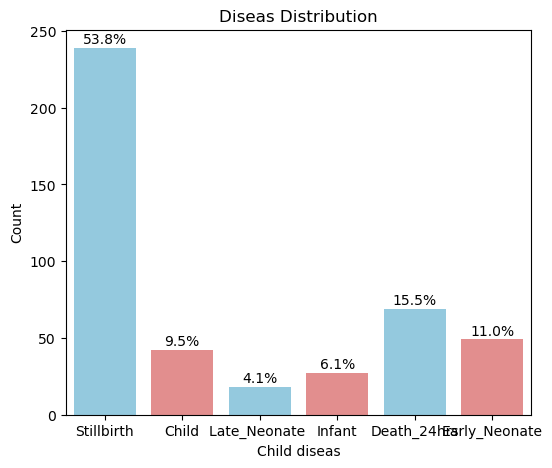

In [577]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dataset' is your DataFrame
plt.figure(figsize=(6, 5))
# Using Seaborn's countplot without hue
ax = sns.countplot(data=df, x='case_type', palette=['skyblue', 'lightcoral'])

total = len(df)  # Total number of samples

# Adding percentage values on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,  # Adjust this value for vertical positioning
            f'{height/total:.1%}',
            ha='center')

plt.title('Diseas Distribution')
plt.xlabel('Child diseas')
plt.ylabel('Count')
plt.show()


<Axes: ylabel='count'>

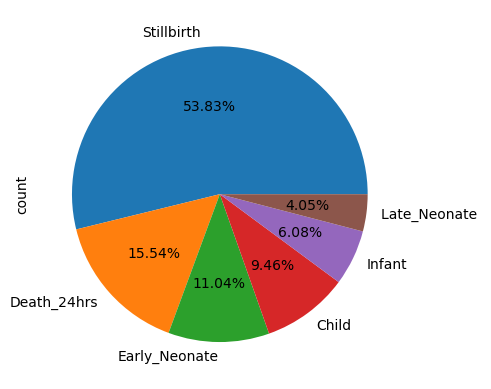

In [578]:
df['case_type'].value_counts().plot(kind='pie', autopct="%1.2f%%")

In [579]:
print(df['case_type'].value_counts(1, ascending=True).apply(lambda x: format(x,'%')))

case_type
Late_Neonate      4.054054%
Infant            6.081081%
Child             9.459459%
Early_Neonate    11.036036%
Death_24hrs      15.540541%
Stillbirth       53.828829%
Name: proportion, dtype: object


<Axes: xlabel='case_type', ylabel='count'>

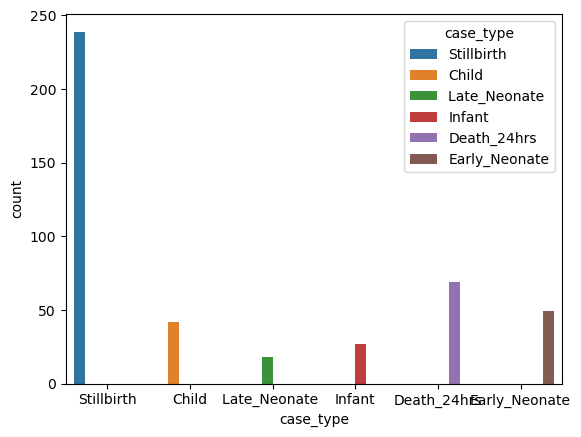

In [580]:
sns.countplot(x="case_type",hue="case_type",data=df)

### Select Relevant Columns from the list

### After preprocessing
Prepare Dataset from using infant_underlying_cause and maternal_factors as independent variable and
top_three_causes as dependent variables.
To filter the dataset by  include only the top three causes of child death (***'Stillbirth', 'Death_24hrs', 'Early_Neonate'*** ) 
and to ensure that the final dataset only contains rows corresponding to these causes

In [588]:
import pandas as pd

# Define the top three causes of child death
top_three_causes = ['Stillbirth', 'Death_24hrs', 'Early_Neonate']

# Filter the DataFrame to include only the top three causes of child death
filtered_df = df[df['case_type'].isin(top_three_causes)].copy()

# Select only the necessary columns from the filtered dataframe
prepared_df = filtered_df[['infant_underlying_cause', 'maternal_factors', 'case_type']].copy()

# Display the prepared dataset
print("Prepared Dataset:")
print(prepared_df.shape)
print(prepared_df.head(10))


Prepared Dataset:
(357, 3)
     infant_underlying_cause  \
0               Undetermined   
1               Undetermined   
2       Intrauterine hypoxia   
7       Intrauterine hypoxia   
8       Intrauterine hypoxia   
9   Hyaline membrane disease   
10            Birth asphyxia   
14   Chromosomal abnormality   
16     Intrauterine hypoxia    
17              Preterm baby   

                                     maternal_factors      case_type  
0                                        Undetermined     Stillbirth  
1                                        Undetermined     Stillbirth  
2   Fetus and newborn affected by other forms of p...     Stillbirth  
7   Fetus and newborn affected by other forms of p...     Stillbirth  
8                                     Uterine rupture     Stillbirth  
9                                           Eclampsia    Death_24hrs  
10                                       Preeclampsia    Death_24hrs  
14                                       Preeclampsi

In [589]:
# Check the magnitude or count of each case type
prepared_df['case_type'].value_counts()

case_type
Stillbirth       239
Death_24hrs       69
Early_Neonate     49
Name: count, dtype: int64

In [590]:
prepared_df.head()

,infant_underlying_cause,maternal_factors,case_type
0,Undetermined,Undetermined,Stillbirth
1,Undetermined,Undetermined,Stillbirth
2,Intrauterine hypoxia,Fetus and newborn affected by other forms of p...,Stillbirth
7,Intrauterine hypoxia,Fetus and newborn affected by other forms of p...,Stillbirth
8,Intrauterine hypoxia,Uterine rupture,Stillbirth


In [591]:
df = prepared_df

In [592]:
# check data types
df.dtypes
for x in df:
    if df[x].dtypes == "float":
        df[x] = df[x].astype("int64")


In [593]:
# Enumerate Function in Python to check unickness of  all columns
for l, k in enumerate(df.columns):
      print(k, ' == >> ',df[k].unique())

infant_underlying_cause  == >>  ['Undetermined' 'Intrauterine hypoxia' 'Hyaline membrane disease'
 'Birth asphyxia' 'Chromosomal abnormality' 'Intrauterine hypoxia '
 'Preterm baby' 'Retardation intrauterine growth'
 'Meconium aspiration syndrome' 'intrauterine hypoxia'
 'Respiratory distress syndrome/HMD' 'Hydrocephalus' 'Low birth weight'
 'Hydrops fetalis' 'Neural tube defect - spina bifida'
 'Congenital muscular-skeletal abnormality'
 'Congenital malformation syndrome' 'Meconium aspiration'
 'hydrops fetalis' 'Neonatal jaundice'
 'Neural tube defect -Lumbar spina bifida' 'Congenital malformation '
 'Intrauterine growth restriction' 'Intrauterine Hyopxia' 'Sepsis'
 'Polycystic kidney disease' 'Congenital toxoplasmosis'
 'Craniorachischisis' 'RH isoimmuzation'
 'Neural tube defect - Craniorachischisis'
 'Intrauterine growth restriction ' 'Congenital CMV infection'
 'Lumbar spina bifida with hydrocephalus / caudal regression'
 'Respiratory distress syndrome' 'Neural tube defect - Anen

In [594]:
df.head()

,infant_underlying_cause,maternal_factors,case_type
0,Undetermined,Undetermined,Stillbirth
1,Undetermined,Undetermined,Stillbirth
2,Intrauterine hypoxia,Fetus and newborn affected by other forms of p...,Stillbirth
7,Intrauterine hypoxia,Fetus and newborn affected by other forms of p...,Stillbirth
8,Intrauterine hypoxia,Uterine rupture,Stillbirth


### Check Data Balancing

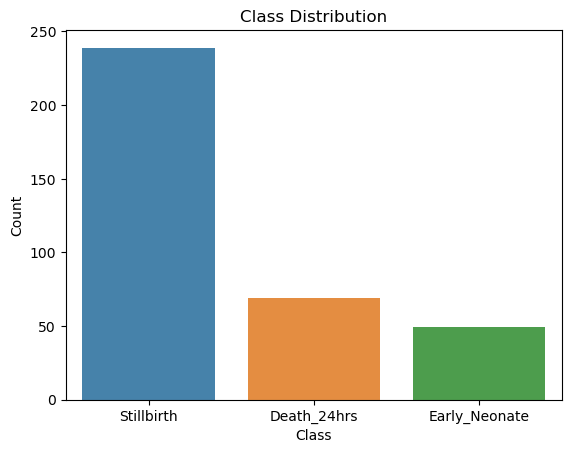

In [595]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'case_type' is the name of your target variable column
class_counts = df['case_type'].value_counts()

# Create a bar plot using Seaborn
sns.barplot(x=class_counts.index, y=class_counts.values, alpha=0.9)

# Set title and labels
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

# Show the plot
plt.show()


#### So from the above we understand that **databalancing** is needed

### Over Sampling using SMOTE

In [596]:
df.columns

Index(['infant_underlying_cause', 'maternal_factors', 'case_type'], dtype='object')

In [597]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [598]:
le = LabelEncoder()
df['infant_underlying_cause'] = le.fit_transform(df['infant_underlying_cause'])
df['maternal_factors'] = le.fit_transform(df['maternal_factors'])
le = LabelEncoder()
df['case_type'] = le.fit_transform(df['case_type'])


### Train and Test Split

In [599]:

# Extract features and target
X = df[['infant_underlying_cause', 'maternal_factors']]  # Ensure these columns exist and are correctly named
y = df['case_type']


In [600]:
from imblearn.over_sampling import SMOTE
# Initialize SMOTE
smote = SMOTE()
# Apply SMOTE
X_smote, Y_smote = smote.fit_resample(X, y)

# Check the shapes of the resampled datasets
print(f"Shape of X_smote: {X_smote.shape}")
print(f"Shape of Y_smote: {Y_smote.shape}")


Shape of X_smote: (717, 2)
Shape of Y_smote: (717,)


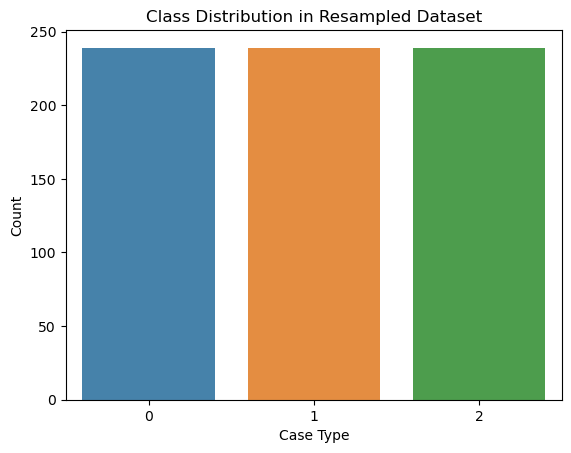

In [601]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Y_smote' is your resampled target variable series with categories 'Stillbirth', 'Death_24hrs', 'Early_Neonate'
class_counts = Y_smote.value_counts()

# Create a bar plot using Seaborn
sns.barplot(x=class_counts.index, y=class_counts.values, alpha=0.9)

# Set title and labels
plt.title('Class Distribution in Resampled Dataset')
plt.xlabel('Case Type')
plt.ylabel('Count')

# Show the plot
plt.show()


### 3.	Correlation analysis
For correlation analysis between infant underlying conditions, maternal factors, and the top three causes of child death, we compute correlation coefficients or use heatmaps to visualize the relationships between these variables. This analysis helps understand how each variable correlates with the top causes of child death.

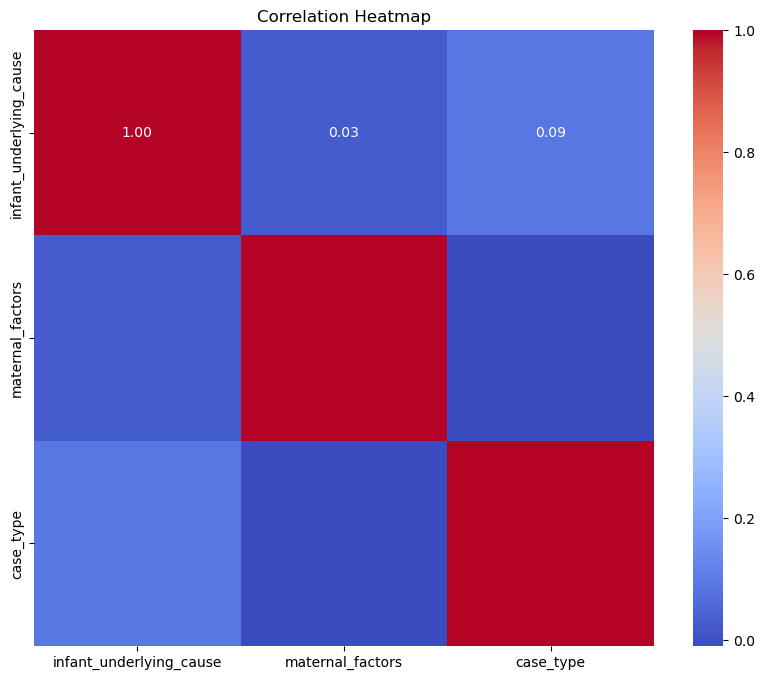

In [602]:
# Create a new DataFrame with resampled data
df_resampled = pd.DataFrame(X_smote, columns=['infant_underlying_cause', 'maternal_factors'])
df_resampled['case_type'] = Y_smote

# Calculate correlation matrix
correlation_matrix = df_resampled.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### 4.	Feature engineering

I have already select the top infant underlying causes and maternal factors(features) that would contribute to the top three causes of child death identified before. 

**A.**	Select the classification models like LogisticRegression, Support Vector Machine, AdaBoostClassifier,  Random Forest Classifier ,  Gradient Boosting Classifier  and XGBOOST and train  each on the dataset.

In [603]:
#splitting data into training and testing data.
#training data = 80% and testing data = 20%
# Split dataset into training set and test set
Xsmote_train, Xsmote_test, ysmote_train, ysmote_test = train_test_split(X_smote, Y_smote, test_size=0.1, random_state=1)



In [604]:
#Import Necessary Libraries and packagse
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [605]:
# Define a dictionary containing the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

# Train each classifier and print the accuracy
for name, classifier in classifiers.items():
    classifier.fit(Xsmote_train, ysmote_train)
    accuracy = classifier.score(Xsmote_test, ysmote_test)
    print(f"{name} Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.375
Support Vector Machine Accuracy: 0.5277777777777778
AdaBoost Classifier Accuracy: 0.5833333333333334
Random Forest Classifier Accuracy: 0.6527777777777778
Gradient Boosting Classifier Accuracy: 0.6805555555555556
XGBoost Accuracy: 0.6666666666666666


### C.	Rank the features based on their importance 

In [606]:

# Define classifiers including Logistic Regression and SVC with OvR strategy
classifiers = {
    'Logistic Regression': LogisticRegression(multi_class='ovr'),
    'Support Vector Machine': SVC(kernel='linear', decision_function_shape='ovr'),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

feature_importances = {}
for name, classifier in classifiers.items():
    classifier.fit(Xsmote_train, ysmote_train)
    if hasattr(classifier, 'feature_importances_'):  # Check if the classifier supports feature importances
        feature_importances[name] = classifier.feature_importances_

# Combine feature importances for all classifiers
all_importances = pd.DataFrame(feature_importances, index=Xsmote_train.columns)

# Rank features in decreasing order
def rank_features(importances):
    all_importances['Mean Importance'] = all_importances.mean(axis=1)
    ranked_features = all_importances.sort_values(by='Mean Importance', ascending=False)
    return ranked_features

# Call rank_features function to get ranked features
ranked_features = rank_features(all_importances)

# Display ranked features in a table
print("Ranked Features:")
print(ranked_features)


Ranked Features:
                         AdaBoost Classifier  Random Forest Classifier  \
infant_underlying_cause                 0.72                   0.68338   
maternal_factors                        0.28                   0.31662   

                         Gradient Boosting Classifier   XGBoost  \
infant_underlying_cause                      0.787576  0.655602   
maternal_factors                             0.212424  0.344398   

                         Mean Importance  
infant_underlying_cause          0.71164  
maternal_factors                 0.28836  


#### B.	Using the appropriate n-fold cross validation and out of sample data, select the best preforming model from the candidate models under 4(A)

In [607]:
# Define a dictionary containing the classifiers
from sklearn.model_selection import cross_val_score
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

# Initialize variables to store the best model and its performance
best_model = None
best_accuracy = 0

# Perform cross-validation and evaluate each model
for name, classifier in classifiers.items():
    # Perform cross-validation
    scores = cross_val_score(classifier, X_smote, Y_smote, cv=5)
    # Calculate mean accuracy
    accuracy = scores.mean()
    # Print the accuracy for each model
    print(f"{name} Mean Accuracy: {accuracy}")
    # Update the best model if the current model performs better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = classifier

# Print the best performing model
print(f"Best Performing Model: {best_model}")


Logistic Regression Mean Accuracy: 0.35419580419580415
Support Vector Machine Mean Accuracy: 0.5146950271950271
AdaBoost Classifier Mean Accuracy: 0.6164335664335664
Random Forest Classifier Mean Accuracy: 0.6849164724164725
Gradient Boosting Classifier Mean Accuracy: 0.6807109557109557
XGBoost Mean Accuracy: 0.6695804195804196
Best Performing Model: RandomForestClassifier()


### Paramer Tuning 
Fine Tune parameter of the selected machine learning algorithm with grid search
to increase the Performance of the model

In [608]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grids for each classifier
param_grids = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Support Vector Machine': {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']},
    'AdaBoost Classifier': {'n_estimators': [100, 200, 300]},
    'Random Forest Classifier': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]},
    'Gradient Boosting Classifier': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 1]},
    'XGBoost': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 1]}
}

# Initialize variables to store the best model and its performance
best_model = None
best_accuracy = 0

# Perform hyperparameter tuning and cross-validation for each model
for name, classifier in classifiers.items():
    # Initialize GridSearchCV
    grid_search = GridSearchCV(classifier, param_grids[name], cv=5, scoring='accuracy')
    # Fit GridSearchCV to the data
    grid_search.fit(X_smote, Y_smote)
    # Get the best model and its performance
    best_estimator = grid_search.best_estimator_
    best_score = grid_search.best_score_
    # Print the best parameters and score
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best score for {name}: {best_score}")
    # Update the best model if the current model performs better
    if best_score > best_accuracy:
        best_accuracy = best_score
        best_model = best_estimator

# Print the best performing model
print(f"\nBest Performing Model: {best_model}")


Best parameters for Logistic Regression: {'C': 0.001}
Best score for Logistic Regression: 0.35419580419580415
Best parameters for Support Vector Machine: {'C': 100, 'kernel': 'rbf'}
Best score for Support Vector Machine: 0.6150446775446776
Best parameters for AdaBoost Classifier: {'n_estimators': 100}
Best score for AdaBoost Classifier: 0.6164724164724165
Best parameters for Random Forest Classifier: {'max_depth': None, 'n_estimators': 300}
Best score for Random Forest Classifier: 0.6974844599844601
Best parameters for Gradient Boosting Classifier: {'learning_rate': 0.1, 'n_estimators': 100}
Best score for Gradient Boosting Classifier: 0.6807109557109557
Best parameters for XGBoost: {'learning_rate': 0.01, 'n_estimators': 300}
Best score for XGBoost: 0.6905108780108781

Best Performing Model: RandomForestClassifier(n_estimators=300)


#### C.	Ensemble the models and see the performance  of the  combination models on the data

In [609]:
# Define the classifiers
logistic_regression_model = LogisticRegression()
svm_model = SVC()
adaboost_model = AdaBoostClassifier()
random_forest_model = RandomForestClassifier()
gradient_boosting_model = GradientBoostingClassifier()
xgboost_model = XGBClassifier()

# Define the ensemble classifier with the models
ensemble_clf = VotingClassifier(estimators=[
    ('Logistic Regression', logistic_regression_model),
    ('Support Vector Machine', svm_model),
    ('AdaBoost Classifier', adaboost_model),
    ('Random Forest Classifier', random_forest_model),
    ('Gradient Boosting Classifier', gradient_boosting_model),
    ('XGBoost', xgboost_model)
], voting='hard')  # 'hard' voting for classification

# Perform cross-validation to evaluate the performance of the ensemble classifier
ensemble_scores = cross_val_score(ensemble_clf, X_smote, Y_smote, cv=5)
print("Ensemble Classifier Mean Accuracy:", ensemble_scores.mean())


Ensemble Classifier Mean Accuracy: 0.6793220668220669


#### E.	Plot the AUC and ROC curve on the same graph to visualize and compare the performance of each of the models above

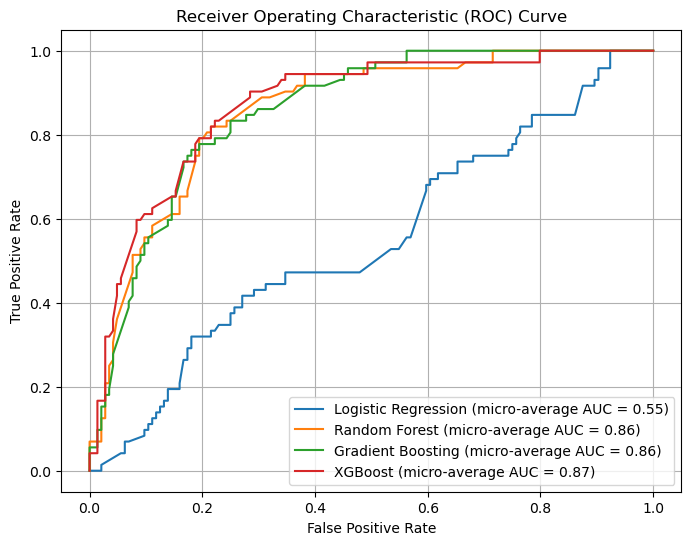

In [610]:
from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_binarized = label_binarize(y_test_encoded, classes=np.unique(y_test_encoded))
n_classes = y_test_binarized.shape[1]  # Calculate the number of classes

# Define the models
models = {
    "Logistic Regression": logistic_regression_model,
    "Random Forest": random_forest_model,
    "Gradient Boosting": gradient_boosting_model,
    "XGBoost": xgboost_model
}

# Plot ROC curves for each model
plt.figure(figsize=(8, 6))

for model_name, model in models.items():
    if model_name == "XGBoost":
        model.fit(Xsmote_train, y_train_encoded)
    else:
        model.fit(Xsmote_train, ysmote_train)
    y_probs = model.predict_proba(Xsmote_test)
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
        roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_probs[:, i])
        
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_probs.ravel())
    roc_auc["micro"] = roc_auc_score(y_test_binarized, y_probs, average="micro")
    
    # Plot ROC curve for each class
    plt.plot(fpr["micro"], tpr["micro"], label=f"{model_name} (micro-average AUC = {roc_auc['micro']:.2f})")

#plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guessing")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid(True)
plt.show()


### 6.Result Visualization and Explanation

#### A.Plot the feature importance in descending order for each of the models using horizontal bar chart

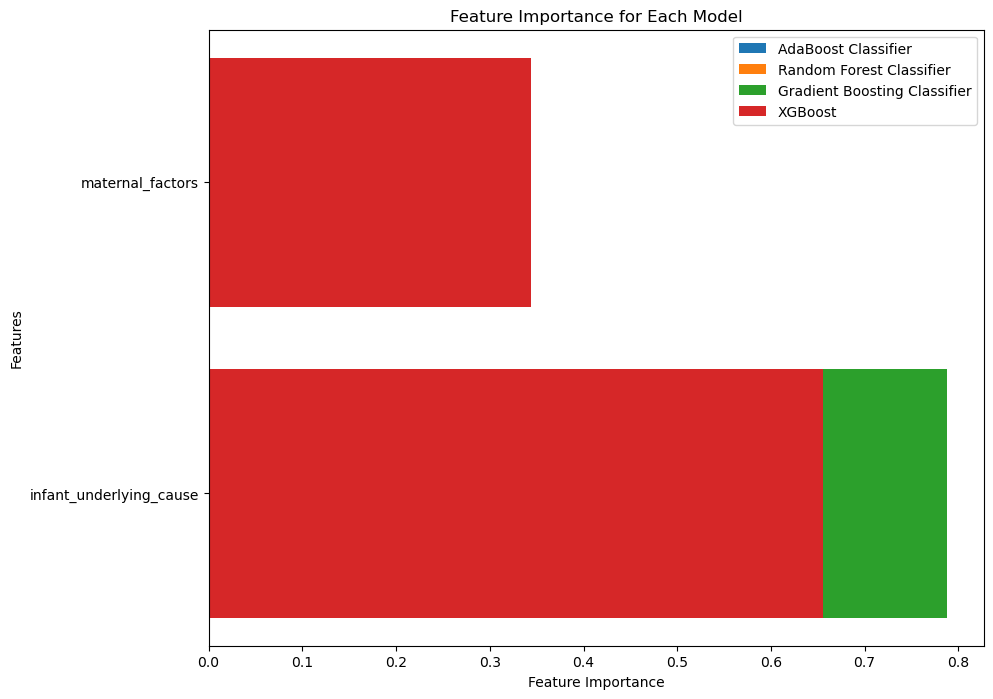

In [611]:
import matplotlib.pyplot as plt

# Define classifiers including Logistic Regression and SVC with OvR strategy
classifiers = {
    'Logistic Regression': LogisticRegression(multi_class='ovr'),
    'Support Vector Machine': SVC(kernel='linear', decision_function_shape='ovr'),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

# Initialize a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))
# Create a SHAP explainer object
explainer = shap.Explainer(model, X_train)

# Plot feature importance for each model
for name, classifier in classifiers.items():
    classifier.fit(Xsmote_train, ysmote_train)
    if hasattr(classifier, 'feature_importances_'):  # Check if the classifier supports feature importances
        feature_importance = classifier.feature_importances_
        sorted_indices = feature_importance.argsort()[::-1]
        sorted_features = Xsmote_train.columns[sorted_indices]
        sorted_importance = feature_importance[sorted_indices]
        ax.barh(sorted_features, sorted_importance, label=name)

# Set labels and title
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Features')
ax.set_title('Feature Importance for Each Model')

# Add legend
ax.legend()

# Show plot
plt.show()


#### B.Plot the top five infant underlying causes of the child death 

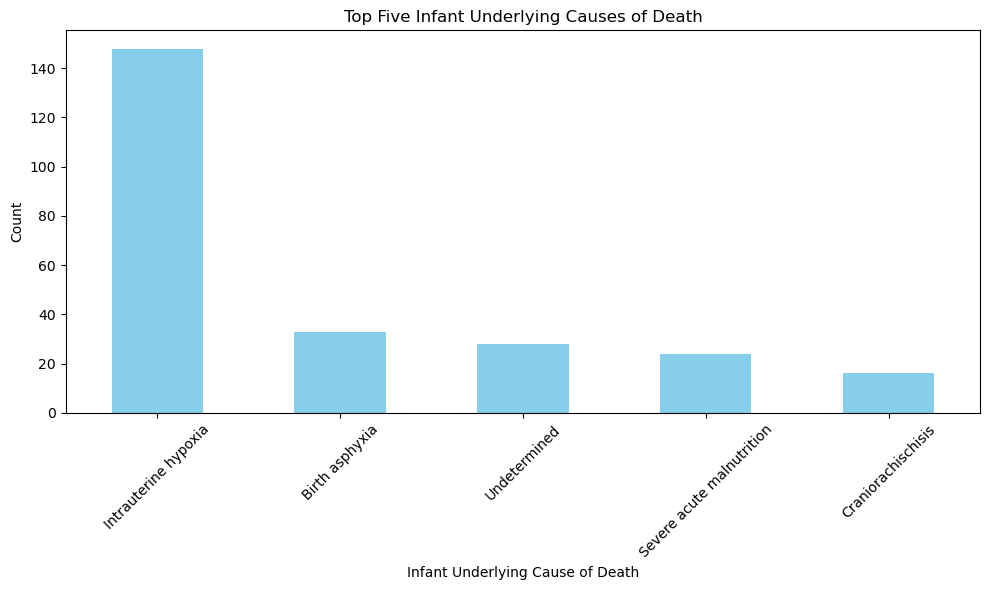

In [585]:
import matplotlib.pyplot as plt

top_five_causes = df['infant_underlying_cause'].value_counts().head(5)

# Plotting
plt.figure(figsize=(10, 6))
top_five_causes.plot(kind='bar', color='skyblue')
plt.xlabel('Infant Underlying Cause of Death')
plt.ylabel('Count')
plt.title('Top Five Infant Underlying Causes of Death')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


#### C. Plot the top five maternal factors contributing to the child death

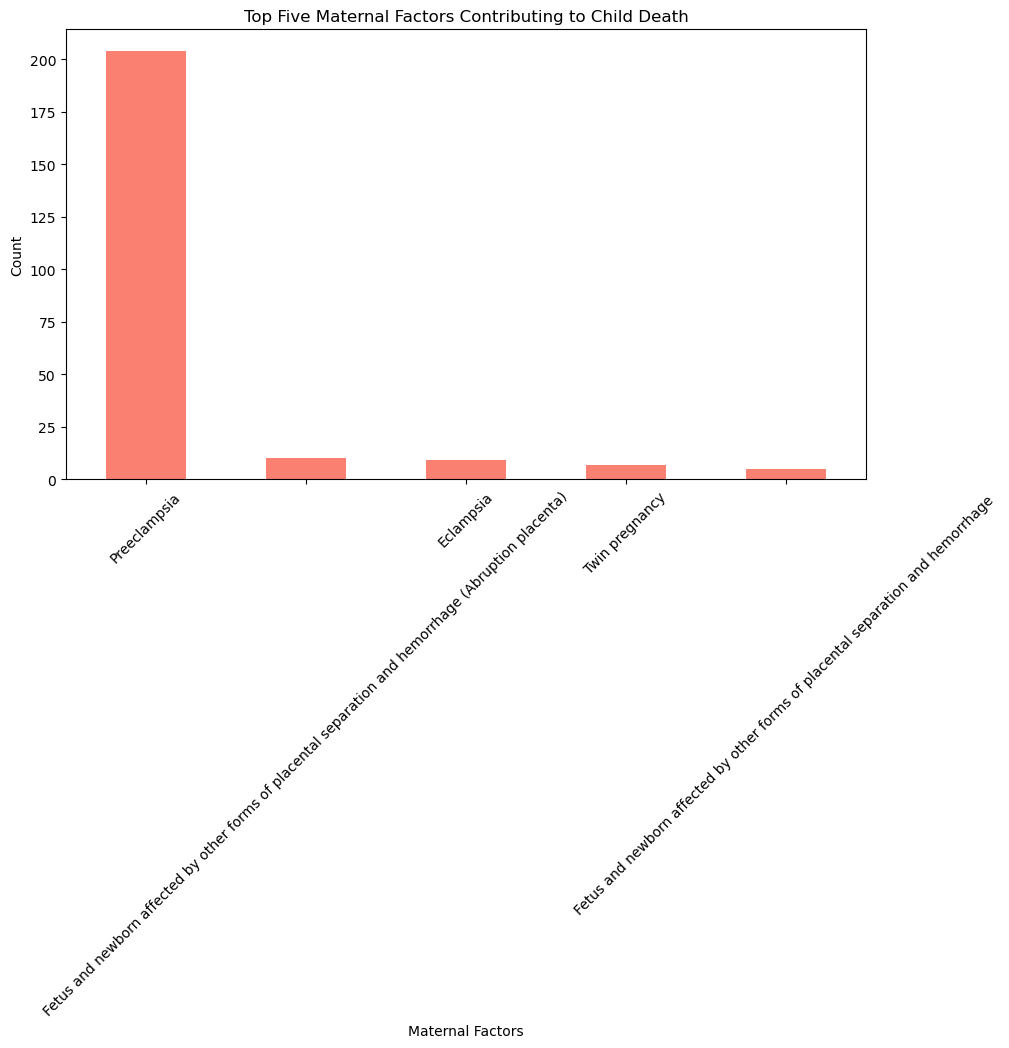

In [586]:
import matplotlib.pyplot as plt

top_five_factors = prepared_df['maternal_factors'].value_counts().head(5)

# Plotting
plt.figure(figsize=(10, 6))
top_five_factors.plot(kind='bar', color='salmon')
plt.xlabel('Maternal Factors')
plt.ylabel('Count')
plt.title('Top Five Maternal Factors Contributing to Child Death')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Manually adjust the subplot parameters to prevent overlapping labels
plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.15)

plt.show()


#### D.Plot the child death based on the case types 

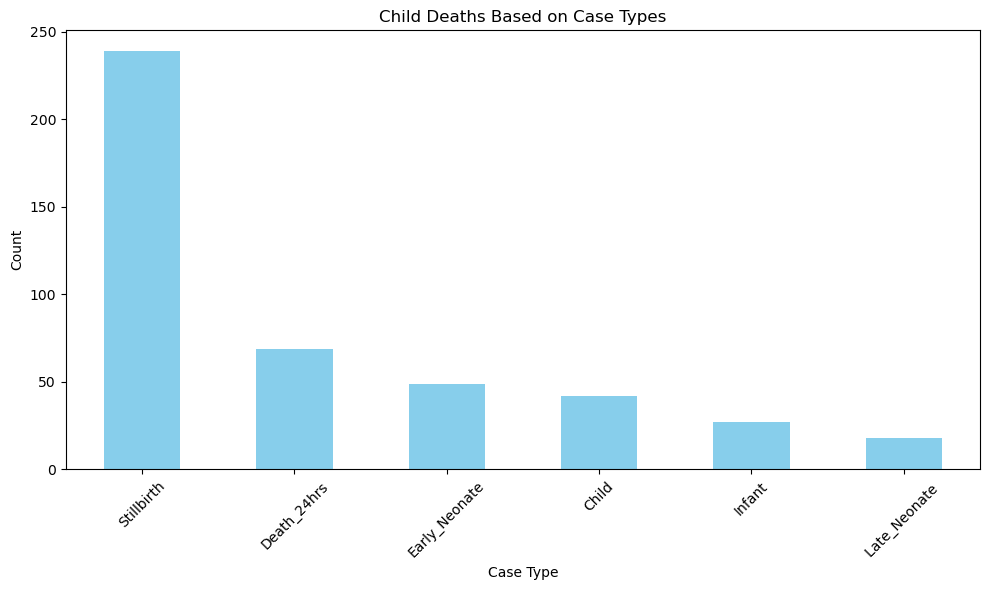

In [587]:
import matplotlib.pyplot as plt

case_types = df['case_type'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
case_types.plot(kind='bar', color='skyblue')
plt.xlabel('Case Type')
plt.ylabel('Count')
plt.title('Child Deaths Based on Case Types')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


# Thank you for reading My work, I will
# The End